In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
%cd /content/drive/MyDrive/Colab\ Notebooks
import flexura

/content/drive/MyDrive/Colab Notebooks


In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks")
import flexura

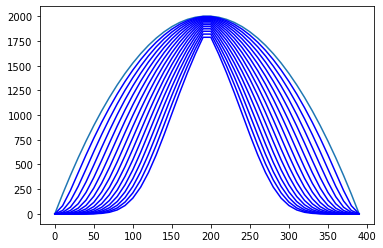

In [19]:
t = 0.0
dt = 100_000.0 #anos
dx = 10_000.0  #metros

x = np.arange(0.0,400_000,dx)
n = np.size(x)

Kf0 = 20.0 #fator que controla a taxa de erosão
Kf1 = 40.0
Kf = x*0 +Kf0
#Kf[x>200_000.0] = Kf1

h = x*(x[-1] - x)
h = 2000.0*h/np.max(h)
plt.plot(x/1000,h)


t_print = 10.0E6
while t <= 150.0E6:
  ind = np.argsort(h) #ordenado, do menor para o maior
  ind = ind[::-1] #invertendo o vetor (do maior para o menor)

  qr = h*0 + 1.0
  denu = h*0

  for i in ind:
    if(i>0 and i <n-1):
      hh = h[i]
      hhe = h[i-1]
      hhd = h[i+1]

      if (hh>hhe):
        if (hhe<hhd):
          denu[i] = Kf[i]*qr[i]**0.5*(hh-hhe)/dx
          qr[i-1] += qr[i]
        elif (hhd<hh):
          denu[i] = Kf[i]*qr[i]**0.5*(hh-hhd)/dx
          qr[i+1] += qr[i]
      elif (hhd<hh):
        denu[i] = Kf[i]*qr[i]**0.5*(hh-hhd)/dx
        qr[i+1] += qr[i]
  h -= denu
  t += dt      
  if(t>t_print):
    plt.plot(x/1000,h,"b")
    t_print += 10.0E6


In [ ]:
a = np.array([10,40,60,30,20])
print(a)

sort_a = np.argsort(a)
print(sort_a)
print(a[sort_a])

[10 40 60 30 20]
[0 4 3 1 2]
[10 20 30 40 60]
